<a href="https://colab.research.google.com/github/MoneyMJ/Finance/blob/main/Risk_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

ticker = 'AAPL'
period1 = int(time.mktime(datetime.datetime(2020, 6, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2020, 12, 31, 23, 59).timetuple()))
interval = '1wk' # 1d, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df1 = pd.read_csv(query_string)

#df.to_csv('AAPL.csv')

ticker = 'TSLA'
period1 = int(time.mktime(datetime.datetime(2020, 6, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2020, 12, 31, 23, 59).timetuple()))
interval = '1wk' # 1d, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df2 = pd.read_csv(query_string)
#df.to_csv('TSLA.csv')

df1=df1[['Close','Date']]

df2=df2[['Close','Date']]

apple_tesla=pd.merge(df1,df2,left_on='Date',right_on='Date')
apple_tesla.columns=['Apple','Date','Tesla']
apple_tesla=apple_tesla[['Date','Apple','Tesla']]

# print(df1)
# print(df2)
print(apple_tesla.head(5))

         Date      Apple       Tesla
0  2020-06-01  82.875000  177.132004
1  2020-06-08  84.699997  187.056000
2  2020-06-15  87.430000  200.179993
3  2020-06-22  88.407501  191.947998
4  2020-06-29  91.027496  241.731995


In [ ]:
apple_tesla.isnull().sum()


Date     0
Apple    0
Tesla    0
dtype: int64

In [ ]:
apple_tesla['Apple'] = (apple_tesla['Apple']-apple_tesla['Apple'].shift(1))/apple_tesla['Apple'].shift(1)

apple_tesla['Tesla'] = (apple_tesla['Tesla']-apple_tesla['Tesla'].shift(1))/apple_tesla['Tesla'].shift(1)
apple_tesla.head(5)

,Date,Apple,Tesla
0,2020-06-01,NaN,NaN
1,2020-06-08,0.022021,0.056026
2,2020-06-15,0.032231,0.070161
3,2020-06-22,0.011180,-0.041123
4,2020-06-29,0.029635,0.259362


In [ ]:
port_cumm_ret=apple_tesla.cumsum()


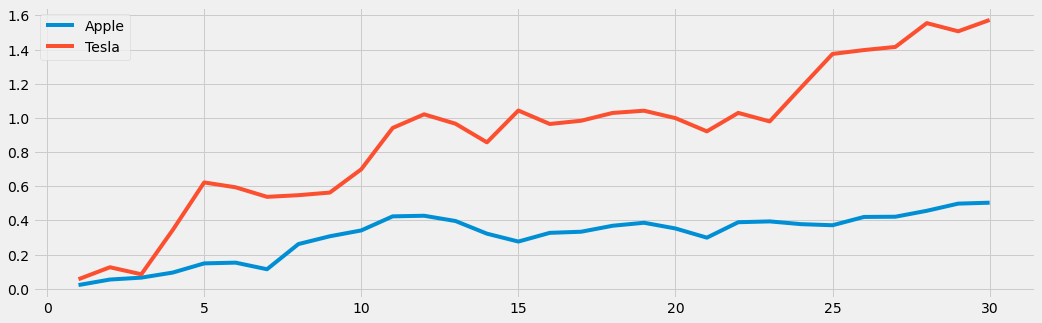

In [ ]:
port_cumm_ret.plot(figsize=([16,5]))
plt.style.use('fivethirtyeight')

In [ ]:
port_std = apple_tesla.std()
print(port_std)

Apple    0.045774
Tesla    0.109050
dtype: float64


In [ ]:
sr_apple=apple_tesla['Apple'].mean()/apple_tesla['Apple'].std()*np.sqrt(252)
print(sr_apple)


5.825771425218394


In [ ]:
sr_tesla=apple_tesla['Tesla'].mean()/apple_tesla['Tesla'].std()*np.sqrt(252)
print(sr_tesla)

7.634699870675334
